Import the libraries

In [0]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

Load the data

In [2]:
from google.colab import files
uploaded = files.upload()

Saving FB.csv to FB.csv


Read the data

In [3]:
df = pd.read_csv('FB.csv')
df.head(7)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-06,191.240005,194.279999,190.550003,193.880005,193.880005,13994900
1,2019-05-07,192.539993,192.899994,187.850006,189.770004,189.770004,16253000
2,2019-05-08,189.389999,190.720001,188.550003,189.539993,189.539993,12505700
3,2019-05-09,187.199997,189.770004,186.259995,188.649994,188.649994,12967000
4,2019-05-10,188.250000,190.000000,184.589996,188.339996,188.339996,12578500
5,2019-05-13,183.500000,185.429993,180.839996,181.539993,181.539993,16833300
6,2019-05-14,182.520004,183.490005,178.100006,180.729996,180.729996,17628100


Create the lists / X and y data set

In [0]:
dates = []
prices = []

Get the number of rows/columns in the dataset

In [5]:
df.shape

(254, 7)

Print the last row of data (this will be the data that we test on)

In [6]:
df.tail(1)

,Date,Open,High,Low,Close,Adj Close,Volume
253,2020-05-06,208.119995,210.5,206.699997,210.179993,210.179993,7722689


Get all of the data except for the last row

In [7]:
df = df.head(len(df)-1)
print(df.shape)

(253, 7)


Get all the rows in the dataset from columns 'date' and 'open'

In [0]:
df_dates = df.loc[:, 'Date']
df_open = df.loc[:, 'Open']

Create the independent data set 'X' as 'dates'

In [0]:
for date in df_dates:
  dates.append([int(date.split('-')[2])]) # Get each 'day' from the date column and append it to the 'dates' list

Create the dependant variable 'y' as 'prices'

In [0]:
for open_price in df_open:
  prices.append(float(open_price)) # Get each 'open price' from the 'open' column and append it to the 'prices' list as a float

See what days were recorded in the dataset

In [13]:
print(dates)

[[6], [7], [8], [9], [10], [13], [14], [15], [16], [17], [20], [21], [22], [23], [24], [28], [29], [30], [31], [3], [4], [5], [6], [7], [10], [11], [12], [13], [14], [17], [18], [19], [20], [21], [24], [25], [26], [27], [28], [1], [2], [3], [5], [8], [9], [10], [11], [12], [15], [16], [17], [18], [19], [22], [23], [24], [25], [26], [29], [30], [31], [1], [2], [5], [6], [7], [8], [9], [12], [13], [14], [15], [16], [19], [20], [21], [22], [23], [26], [27], [28], [29], [30], [3], [4], [5], [6], [9], [10], [11], [12], [13], [16], [17], [18], [19], [20], [23], [24], [25], [26], [27], [30], [1], [2], [3], [4], [7], [8], [9], [10], [11], [14], [15], [16], [17], [18], [21], [22], [23], [24], [25], [28], [29], [30], [31], [1], [4], [5], [6], [7], [8], [11], [12], [13], [14], [15], [18], [19], [20], [21], [22], [25], [26], [27], [29], [2], [3], [4], [5], [6], [9], [10], [11], [12], [13], [16], [17], [18], [19], [20], [23], [24], [26], [27], [30], [31], [2], [3], [6], [7], [8], [9], [10], [13], [

Create a function to make predictions using 3 different support vector regression models with 3 different kernels to see which one is better

In [0]:
def predict_prices(dates, prices, x):

  # Create 3 Support Vector Regression Models
  svr_lin = SVR(kernel='linear', C=1e3)
  svr_poly = SVR(kernel='poly', C=1e3, degree=2)
  svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)

  # Train the models on the dates and prices
  svr_lin.fit(dates, prices)
  svr_poly.fit(dates, prices)
  svr_rbf.fit(dates, prices)

  # Plot the models on a graph to see which has the best fit
  plt.scatter(dates, prices, color='black', label='Data')
  plt.scatter(dates, svr_rbf.predict(dates), color='red', label='RBF Model')
  plt.scatter(dates, svr_lin.predict(dates), color='green', label='Linear Model')
  plt.scatter(dates, svr_poly.predict(dates), color='blue', label='Polynomial Model')

  plt.xlabel('Date')
  plt.ylabel('Price')
  plt.title('Support Vector Regression')
  plt.legend()
  plt.show()

  # Return all 3 model predictions
  return svr_rbf.predict(x)[0], svr_lin.predict(x)[0], svr_poly.predict(x)[0] 

Predict the price of FB on the last day

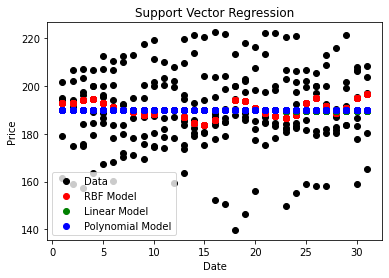

(191.1397943230441, 190.06000200013813, 189.8861261948042)


In [17]:
predicted_price = predict_prices(dates, prices, [[6]])
print(predicted_price)